In [1]:
import torch
import torchvision
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split
%matplotlib inline
import tqdm
import cv2

In [2]:
project_name = 'Blood cell images1'

In [3]:
#pip install torch==1.7.1+cu110 torchvision==0.8.2+cu110 torchaudio==0.7.2 -f https://download.pytorch.org/whl/torch_stable.html
#!pip install jovian --upgrade --quiet

In [4]:
import os
from pathlib import Path

In [5]:
test_ds = Path(r"C:\Users\USER-PC\Documents\Data Science\data set\Pictures\Blood cell images\dataset2-master\dataset2-master\images\TEST")
#test_ds = Path(r"C:\Users\USER-PC\Documents\Data Science\data set\Pictures\Blood cell images\dataset-master\dataset-master\JPEGImages")
img_dir = Path(r"C:\Users\USER-PC\Documents\Data Science\data set\Pictures\Blood cell images\dataset2-master\dataset2-master\images\TRAIN")

In [6]:
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
import torchvision.transforms as T

In [7]:
image_size = 32
batch_size = 200
stats = ((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))

In [8]:
dataset = ImageFolder(img_dir, transform = T.Compose([T.Resize(image_size),
                                                    T.CenterCrop(image_size),
                                                    T.ToTensor()]))

from torch.autograd import Variable

def resize2d(image, size):
    return (F.adaptive_avg_pool2d(Variable(image, volatile= True), size)).data

image = torch.Tensor(3, 256, 256).uniform_()
print(image.size())
image = resize2d(image, (224, 224))
print(image.size())

#p(dataset).size

In [9]:
dataset.classes

['EOSINOPHIL', 'LYMPHOCYTE', 'MONOCYTE', 'NEUTROPHIL']

In [10]:
img, label = dataset[0]
print(img.shape, label)
img

torch.Size([3, 32, 32]) 0


tensor([[[0.7922, 0.7804, 0.7137,  ..., 0.0000, 0.0000, 0.0000],
         [0.7412, 0.7294, 0.7255,  ..., 0.0000, 0.0000, 0.0000],
         [0.7294, 0.7451, 0.7216,  ..., 0.0000, 0.0000, 0.0000],
         ...,
         [0.7647, 0.7843, 0.7804,  ..., 0.7294, 0.7765, 0.5608],
         [0.7059, 0.7216, 0.7451,  ..., 0.7529, 0.7843, 0.3882],
         [0.7059, 0.6980, 0.6941,  ..., 0.7255, 0.7098, 0.2118]],

        [[0.7882, 0.7490, 0.6745,  ..., 0.0000, 0.0000, 0.0000],
         [0.6902, 0.6353, 0.6314,  ..., 0.0000, 0.0000, 0.0000],
         [0.6275, 0.6314, 0.6196,  ..., 0.0000, 0.0000, 0.0000],
         ...,
         [0.7373, 0.7569, 0.7529,  ..., 0.6549, 0.7412, 0.5373],
         [0.6314, 0.6510, 0.6980,  ..., 0.7059, 0.7686, 0.3765],
         [0.5922, 0.5725, 0.5882,  ..., 0.6471, 0.6510, 0.2000]],

        [[0.7412, 0.7059, 0.6471,  ..., 0.0000, 0.0000, 0.0000],
         [0.6510, 0.6353, 0.6314,  ..., 0.0000, 0.0000, 0.0000],
         [0.6196, 0.6157, 0.6078,  ..., 0.0000, 0.0000, 0.

In [11]:
def show_example(img, label):
    print('Label: ', dataset.classes[label], "("+str(label)+")")
    plt.imshow(img.permute(1, 2, 0))

Label:  EOSINOPHIL (0)


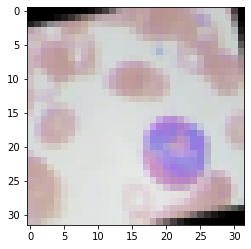

In [12]:
show_example(*dataset[1])

In [13]:
import jovian

In [14]:
jovian.commit(project= project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "vikthour/blood-cell-images1" on https://jovian.ai/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/vikthour/blood-cell-images1


'https://jovian.ai/vikthour/blood-cell-images1'

In [15]:
random_seed = 20
torch.manual_seed(random_seed)

In [16]:
from torch.utils.data.dataloader import DataLoader

batch_size = 32

In [17]:
len(dataset)

9957

In [18]:
val_size = 957
train_size = len(dataset) - val_size

train_ds, val_ds = random_split(dataset, [train_size, val_size])
len(train_ds), len(val_ds)

(9000, 957)

In [19]:
train_ds, val_ds = random_split(dataset, [train_size, val_size])
len(train_ds), len(val_ds)

(9000, 957)

In [20]:
train = DataLoader(train_ds, batch_size, shuffle= True, num_workers= 3, collate_fn=None, pin_memory=True)
val = DataLoader(val_ds, batch_size*2, num_workers = 3, collate_fn = None, pin_memory = True)
test = DataLoader(test_ds, batch_size, num_workers= 3, collate_fn=None, pin_memory=True)

In [21]:
from torchvision.utils import make_grid

def show_batch(data):
    for image, label in data:
        fig, ax = plt.subplots(figsize = (12, 6))
        ax.set_xticks([]); ax.set_yticks([])
        plt.imshow(make_grid(image, nrow = 16).permute(1, 2, 0))
        break

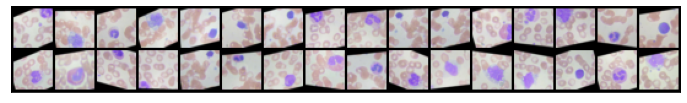

In [22]:
show_batch(train)

In [23]:
jovian.commit(project= project_name, environment=None)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "vikthour/blood-cell-images1" on https://jovian.ai/
[jovian] Uploading notebook..
[jovian] Committed successfully! https://jovian.ai/vikthour/blood-cell-images1


'https://jovian.ai/vikthour/blood-cell-images1'

In [24]:
import torch.nn as nn
import torch.nn.functional as F

In [25]:
class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))
        
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

def conv_block(in_channels, out_channels, pool=False):
    layers = [nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1), 
              nn.BatchNorm2d(out_channels), 
              nn.ReLU(inplace=True)]
    if pool: layers.append(nn.MaxPool2d(2))
    return nn.Sequential(*layers)

class BloodCellModel(ImageClassificationBase):
    def __init__(self, in_channels, num_classes):
        super().__init__()
        
        self.conv1 = conv_block(in_channels, 64)
        self.conv2 = conv_block(64, 128, pool=True)
        self.res1 = nn.Sequential(conv_block(128, 128), conv_block(128, 128))
        
        self.conv3 = conv_block(128, 256, pool=True)
        self.conv4 = conv_block(256, 512, pool=True)
        self.res2 = nn.Sequential(conv_block(512, 512), conv_block(512, 512))
        
        self.classifier = nn.Sequential(nn.MaxPool2d(4), 
                                        nn.Flatten(), 
                                        nn.Dropout(0.2),
                                        nn.Linear(512, num_classes))
        
    def forward(self, xb):
        out = self.conv1(xb)
        out = self.conv2(out)
        out = self.res1(out) + out
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.res2(out) + out
        out = self.classifier(out)
        return out

In [26]:
class BloodCellModel(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 64 x 16 x 16

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 128 x 8 x 8

            nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(512, 1024, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 256 x 4 x 4
            
            #nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1),
            #nn.ReLU(),
            #nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            #nn.ReLU(),
            #nn.MaxPool2d(2, 2), # output: 512 x 2 x 2
            
            #nn.Conv2d(512, 1024, kernel_size=3, stride=1, padding=1),
            #nn.ReLU(),
            #nn.Conv2d(1024, 1024, kernel_size=3, stride=1, padding=1),
            #nn.ReLU(),
            #nn.MaxPool2d(2, 2), # output: 1024 x 2 x 2
            
            nn.Flatten(), 
            nn.Linear(1024* 4* 4, 512),
            nn.ReLU(),
            nn.Linear(512, 64),
            nn.ReLU(),
            nn.Linear(64, 4))
                        
        
    def forward(self, xb):
        return self.network(xb)

In [27]:
in_channels = 3
num_classes = 4

In [28]:
model = BloodCellModel()
model

BloodCellModel(
  (network): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(512, 1024, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Flatten()
    (16): Linear(in_features=16384, out_features=512, bias=True)
    (17): ReLU()
    (18): Linear(in_features=512, out_features=

for images, labels in train:
    print('images.shape:', images.shape)
    out = model(images)
    print('output_shape[0]: ', out[0].shape)
    break

In [29]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [30]:
device = get_default_device()
device

device(type='cpu')

In [31]:
train = DeviceDataLoader(train, device)
val = DeviceDataLoader(val, device)
to_device(model, device);

In [32]:
jovian.commit(project= project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "vikthour/blood-cell-images1" on https://jovian.ai/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/vikthour/blood-cell-images1


'https://jovian.ai/vikthour/blood-cell-images1'

In [33]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [34]:
model = to_device(BloodCellModel(), device)

In [35]:
evaluate(model, val)

{'val_loss': 1.3900721073150635, 'val_acc': 0.24045422673225403}

In [36]:
num_epochs = 5
opt_func = torch.optim.Adam
lr = 0.1

In [37]:
jovian.reset()
jovian.log_hyperparams({
    'num_epochs': num_epochs,
    'opt_func': opt_func.__name__,
    'batch_size': batch_size,
    'lr': lr,
})

[jovian] Hyperparams logged.


In [ ]:
history = fit(num_epochs, lr, model, train, val, opt_func)

In [ ]:
jovian.log_metrics(train_loss=history[-1]['train_loss'], 
                   val_loss=history[-1]['val_loss'], 
                   val_acc=history[-1]['val_acc'])

In [ ]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

In [ ]:
plot_accuracies(history)

In [ ]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

In [ ]:
plot_losses(history)

In [ ]:
jovian.commit(project= project_name)

In [ ]:
test = ImageFolder(test_ds, transform=T.Compose([T.Resize(image_size),
                                                 T.CenterCrop(image_size),
                                                 T.ToTensor(),
                                                 T.Normalize(*stats)]))

In [ ]:
def predict_image(img, model):
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return dataset.classes[preds[0].item()]

In [ ]:
img, label = dataset[0]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

In [ ]:
img, label = dataset[5]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

In [ ]:
img, label = dataset[150]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

In [ ]:
test_loader = DeviceDataLoader(DataLoader(test, batch_size*2), device)
result = evaluate(model, test_loader)
result

In [ ]:
jovian.log_metrics(test_loss=result['val_loss'], test_acc=result['val_acc'])

In [ ]:
torch.save(model.state_dict(), 'blood_cell.pth')

In [ ]:
jovian.commit(project= project_name)

In [ ]:
#jovian.submit(assignment="zerotogans-project")